In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import ast
from collections import Counter

Importamos los datos y elegimos las variables con las que se va a trabajar en el modelo de ml

In [4]:
data = pd.read_csv('Dataset\data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24064 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    29895 non-null  object 
 6   tags            31972 non-null  object 
 7   discount_price  225 non-null    float64
 8   reviews_url     32133 non-null  object 
 9   specs           31465 non-null  object 
 10  price           30748 non-null  float64
 11  early_access    32135 non-null  bool   
 12  id              32133 non-null  float64
 13  developer       28836 non-null  object 
 14  sentiment       24953 non-null  object 
 15  metascore       2607 non-null   float64
 16  release_year    29895 non-null  float64
dtypes: bool(1), float64(5), object(

In [6]:
data.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,release_year
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN,2018.0
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,643980.0,Secret Level SRL,Mostly Positive,NaN,2018.0
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,670290.0,Poolians.com,Mostly Positive,NaN,2017.0
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,NaN,2017.0
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,NaN,NaN,NaN,NaN


Las variables elegidas son Genres, Early-acces y Year

In [7]:
price = data.price

In [8]:
price.describe()

count    30748.000000
mean         8.869739
std         15.905239
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

Observamos que el 75 % de los datos en price estan por debajo de 9.99 y el valor maximo es 995 por lo tanto la variable esta sesgada y existen outliers, observemos graficamente

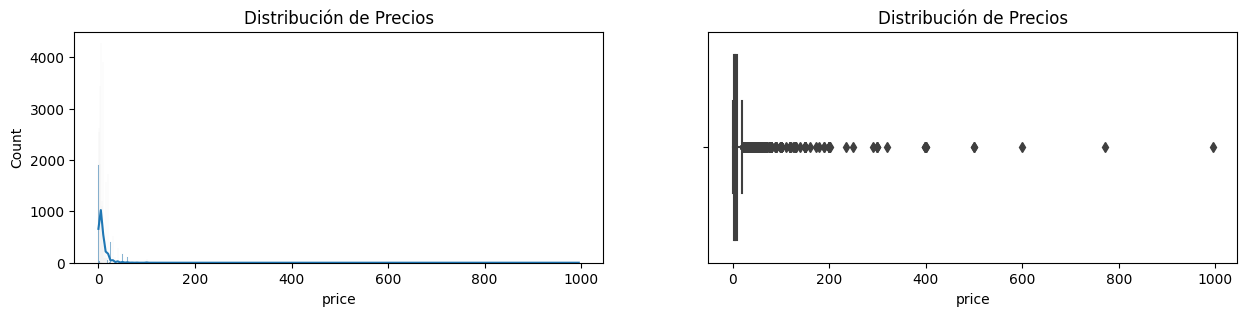

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,3))

ax[0].set_title('Distribución de Precios')
sns.histplot(price, kde=True, stat='count', ax=ax[0])

ax[1].set_title('Distribución de Precios')
sns.boxplot(price, x=price, ax=ax[1])

plt.show()

Reducimos la variable a los precios menores a 50 para observar mejor como se comporta la variable

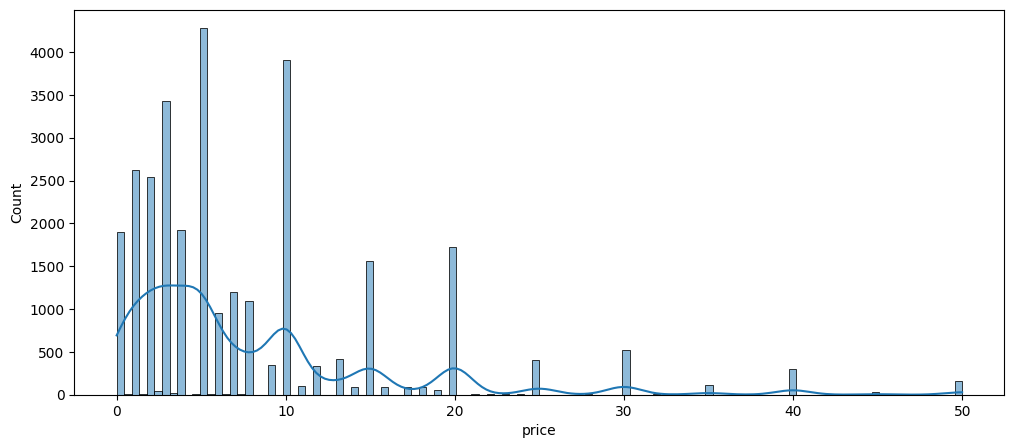

In [66]:
fig = plt.figure(figsize=(12, 5))
sns.histplot(price[price<50], kde=True, stat='count')
plt.show()

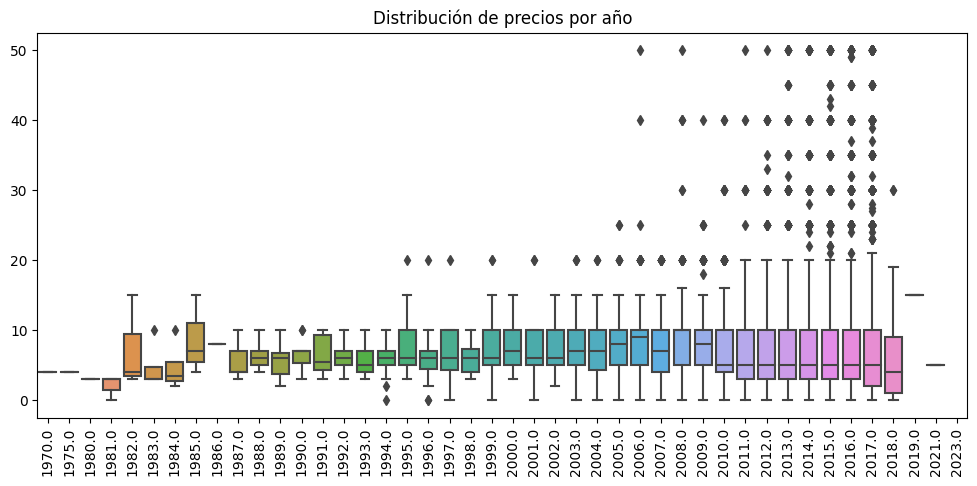

In [89]:
fig = plt.figure(figsize=(12, 5))
sns.boxplot(y=price[price<50], x=data['release_year'])
plt.xticks(rotation=90)
plt.title('Distribución de precios por año')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [54]:
Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f'Rango intercuartilico : {IQR}')
print(f'Limite inferior : {lower_limit}')
print(f'Limite superior : {upper_limit}')

Rango intercuartilico : 7.0
Limite inferior : -7.51
Limite superior : 20.490000000000002


In [62]:
price_filtered = price[(price >= lower_limit) & (price <= upper_limit)]

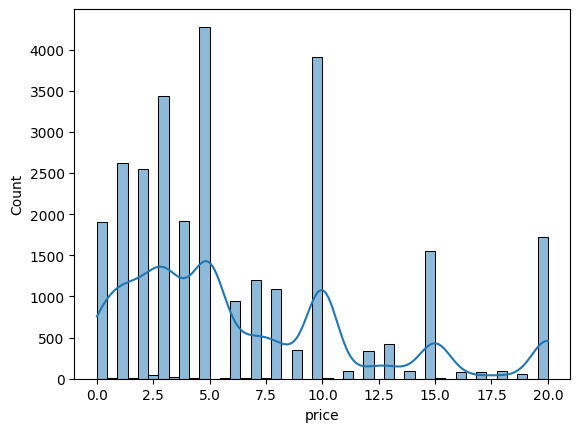

In [92]:
sns.histplot(price_filtered, kde=True, stat='count')
plt.show()

In [10]:
genres = data.genres

In [11]:
genres = genres.dropna()

In [12]:
genres = genres.apply(ast.literal_eval)

In [13]:
all_genres = genres.explode()

In [14]:
all_genres = Counter(all_genres)

In [15]:
all_genres

Counter({'Indie': 15858,
         'Action': 11321,
         'Casual': 8282,
         'Adventure': 8243,
         'Strategy': 6957,
         'Simulation': 6699,
         'RPG': 5479,
         'Free to Play': 2031,
         'Early Access': 1462,
         'Sports': 1257,
         'Massively Multiplayer': 1108,
         'Racing': 1083,
         'Design &amp; Illustration': 460,
         'Utilities': 340,
         'Web Publishing': 268,
         'Animation &amp; Modeling': 183,
         'Education': 125,
         'Video Production': 116,
         'Software Training': 105,
         'Audio Production': 93,
         'Photo Editing': 77,
         'Accounting': 7})

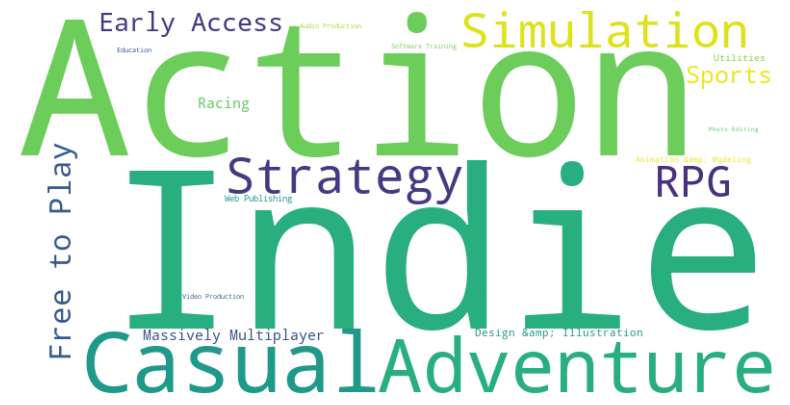

In [16]:
## Creamos una nube de palabras de los generos mas repetidos

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(all_genres)

plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
data_clean = pd.concat([price, data['release_year'], data['early_access'], genres], axis=1)

In [24]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         30748 non-null  float64
 1   release_year  29895 non-null  float64
 2   early_access  32135 non-null  bool   
 3   genres        28852 non-null  object 
dtypes: bool(1), float64(2), object(1)
memory usage: 784.7+ KB


In [27]:
data_clean['release_year'] = data_clean['release_year'].astype(int)

In [28]:
data_clean.head()

,price,release_year,early_access,genres
0,4.99,2018,False,"[Action, Casual, Indie, Simulation, Strategy]"
1,0.00,2018,False,"[Free to Play, Indie, RPG, Strategy]"
2,0.00,2017,False,"[Casual, Free to Play, Indie, Simulation, Sports]"
3,0.99,2017,False,"[Action, Adventure, Casual]"
5,3.99,2018,False,"[Action, Adventure, Simulation]"


In [29]:
data_clean = data_clean.dropna()

In [30]:
data_clean.to_csv('Dataset\data_clean.csv', index=False)